In [12]:
import pandas as pd 
import matplotlib
from csv import DictReader

In [13]:
# TODO
    # Compare the top ten baby names of 2018 to the top ten baby names of 1918
    # Plot the top ten in 2018 against those same names in 1918
    # Plot the tope ten in 1918 against the same names in 2018


## Analysis of 2018 Baby Names

In [14]:
def read_csv_rows(filename: str) -> list[dict[str, str]]:
    """Read the rows of a csv into a 'table'."""
    # Returns a list of the rows. 
    result: list[dict[str, str]] = [] 

    # Open a handle to the data file
    file_handle = open(filename, "r", encoding="utf8")
    
    # Read that file.
    # Prepare to read the data file as a CSV rather than just strings.
    csv_reader = DictReader(file_handle)

    # Read each row of CSV line-by-line
    for row in csv_reader:
        result.append(row)

    # Close that file when we're done, to free its resources.
    file_handle.close()

    return result


In [15]:
# Read CSV Data Generated from Social Security Administration on Most Popular Baby Names - 2018
SURVEY_DATA_CSV_FILE_PATH: str = "../data/yob2018.csv"
data = pd.read_csv(SURVEY_DATA_CSV_FILE_PATH, names = ['name', 'sex', 'occurence'])

### Analysis of Top Ten Male and Female Names 

In [16]:
# Assign null value to all names assigned sex of female at birth 
male_data = data.mask(data['sex'] == 'F')
# # Drop the null values
# male_data = pd.DataFrame(male_data.Sex.notnull())
male_data = male_data.dropna()
top_ten_male = male_data.head(10)

# --- Mask Male Data ----
female_data = data.mask(data['sex'] == 'M').dropna()
top_ten_female = female_data.head(10)
top_ten_female

,name,sex,occurence
0,Emma,F,18757.0
1,Olivia,F,17993.0
2,Ava,F,14975.0
3,Isabella,F,14517.0
4,Sophia,F,13972.0
5,Charlotte,F,12998.0
6,Mia,F,12697.0
7,Amelia,F,12354.0
8,Harper,F,10619.0
9,Evelyn,F,10412.0


#### 2018 Male Names Analysis

<BarContainer object of 10 artists>

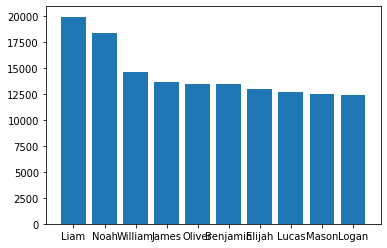

In [17]:
matplotlib.rcParams['figure.figsize'] = [10, 10]
from matplotlib import pyplot as plt 
plt.bar(top_ten_male.name, top_ten_male.occurence)

##### Determine the top first letter of the name in a given year

In [18]:
# Sort the data by top values 
male_data = male_data.sort_values('occurence', ascending=False)

# -- Determine occurence of the first initial --
result: dict[str, int] = {}
for name in male_data["name"]:
    if name[0] not in result:
        result[name[0]] = 1
    else:
        result[name[0]] += 1      
x = sorted(result.items())
first_letters = dict(x)

<BarContainer object of 26 artists>

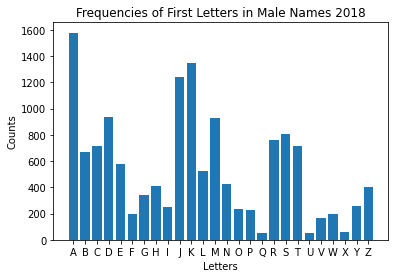

In [19]:
plt.title("Frequencies of First Letters in Male Names 2018")
plt.xlabel("Letters")
plt.ylabel("Counts")
labels: list[str] = list(first_letters.keys())
values: list[int] = list(first_letters.values())
plt.bar(labels, values)

Analysis: Although none of the top ten names had the first letter 'A' nor the first letter 'K' these two letters were still the top first name initials of males born in 2018.


#### 2018 Female Name Analysis

<BarContainer object of 10 artists>

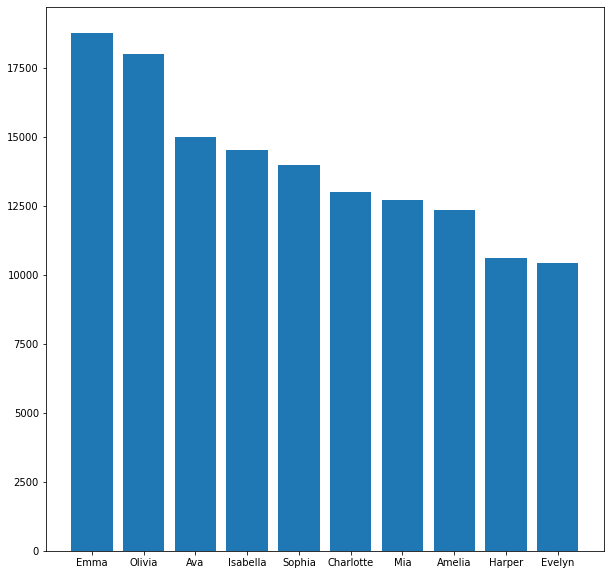

In [20]:
matplotlib.rcParams['figure.figsize'] = [10, 10]
from matplotlib import pyplot as plt 
plt.bar(top_ten_female.name, top_ten_female.occurence)

In [28]:
# Sort the data by top values 
female_data = female_data.sort_values('occurence', ascending=False)

# TODO 
# Clean the female_data database. 
# One of the letters in the database is in the wrong format. 

# -- Determine occurence of the first initial --
result_female: dict[str, int] = {}
for name in female_data["name"]:
    if name[0] not in result:
        result_female[name[0]] = 1
#     else:
#         result_female[name[0]] += 1      
# x = sorted(result_female.items())
# first_letters_females = dict(x)
female_data

,name,sex,occurence
0,Emma,F,18757.0
1,Olivia,F,17993.0
2,Ava,F,14975.0
3,Isabella,F,14517.0
4,Sophia,F,13972.0
...,...,...,...
18095,Zymirah,F,5.0
18096,Zynah,F,5.0
18097,Zyniyah,F,5.0
18098,Zynlee,F,5.0


NameError: name 'first_letters_females' is not defined

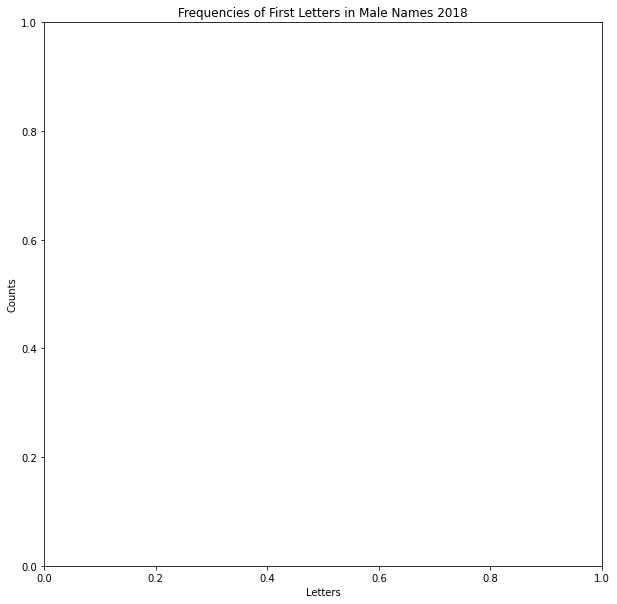

In [31]:
plt.title("Frequencies of First Letters in Male Names 2018")
plt.xlabel("Letters")
plt.ylabel("Counts")
labels: list[str] = list(first_letters_females.keys())
values: list[int] = list(first_letters_females.values())
plt.bar(labels, values)